In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

#from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score
from sklearn.model_selection import KFold, train_test_split, cross_val_score

In [2]:
#Cross Validation
#k = number of folds, model = your model without training, X and y are features and target
def crossValidation(k, model, X, y):
    kfold = KFold(n_splits=k, shuffle=True, random_state=31)
    scores = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        #scores.append(mean_squared_error(y_test, y_pred))
        scores.append(accuracy_score(y_test, y_pred))
    #print(np.sqrt(scores))
    return scores

In [3]:
#pred > predictions from model, y_test is the target for testing set
def showMetrics(pred, y_test):
    report = classification_report(y_test, pred)
    print('Classification Report')
    print(report)
    
    cm = confusion_matrix(y_test, pred) #confustion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

In [4]:
assmnt_df = pd.read_csv('data/assessments.csv')
assmnt_df.name = 'assessments'

courses_df = pd.read_csv('data/courses.csv')
courses_df.name = 'courses'

stdassmnt_df = pd.read_csv('data/studentAssessment.csv')
stdassmnt_df.name = 'studentAssessment'

stdinfo_df = pd.read_csv('data/studentInfo.csv')
stdinfo_df.name = 'studentInfo'

stdreg_df = pd.read_csv('data/studentRegistration.csv')
stdreg_df.name = 'studentRegistration'

stdvle_df = pd.read_csv('data/studentVle.csv')
stdvle_df.name = 'studentVle'

vle_df = pd.read_csv('data/vle.csv')
vle_df.name = 'vle_df'

In [5]:
files_list = [assmnt_df, courses_df, stdassmnt_df, stdinfo_df, stdreg_df, stdvle_df, vle_df]

In [6]:
for file in files_list:
    print("%s:" % file.name)
    display(file.head())
    print(file.info())
    #print(file.describe())
    print('\n')
    for field in file:
        print("{}: {}".format(field, file[field].unique()))
        print('\n')

assessments:


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
None


code_module: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']


code_presentation: ['2013J' '2014J' '2013B' '2014B']


id_assessment: [ 1752  1753  1754  1755  1756  1757  1758  1759  1760  1761  1762  1763
 14991 14992 14993 14994 14995 14984 14985 14986 14987 14988 14989 14990
 15003 15004 15005 15006 15007 14996 14997 14998 14999 15000 15001 15002
 15015 15016 15017 15018 15019 15008 15009 15010 15011 15012 15013 15014
 15020 15021 15022 150

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
None


code_module: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']


code_presentation: ['2013J' '2014J' '2013B' '2014B']


module_presentation_length: [268 269 262 240 234 241 261]


studentAssessment:


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB
None


id_assessment: [ 1752  1753  1754  1755  1756  1758  1759  1760  1761  1762 14984 14985
 14986 14987 14988 14989 14991 14992 14993 14994 14995 14996 14997 14998
 14999 15000 15001 15003 15004 15005 15006 15007 15008 15009 15010 15011
 15012 15013 15015 15016 15017 15018 15019 15020 15021 15022 15023 15024
 24282 24283 24284 24285 24286 24287 24288 24289 24290 24291 24292 24293
 24294 24295 24296 24297 24298 24299 25334 25335 25336 25337 25338 25339
 25340 25341 25342 25343 25344 25345 25346 25347 25348 253

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB
None


code_module: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']


code_presentation: ['2013J' '2014J' '2013B' '2014B']


id_student: [  11391

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB
None


code_module: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']


code_presentation: ['2013J' '2014J' '2013B' '2014B']


id_student: [  11391   28400   30268 ... 2648187 2679821 2684003]


date_registration: [-159.  -53.  -92.  -52. -176. -110.  -67.  -29.  -33. -179. -103.  -47.
  -59.  -68. -180.  -95. -130.  -50. -107.  -27.  -31. -170.  -62. -100.
 -109.    5.  -43.  -26.  -32.  -99.  -82. -197.  -75.  -96. -195.  -61.
  -37.  -36. -132. -138. -174.  -44.  -16.  -54.  -64

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB
None


code_module: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']


code_presentation: ['2013J' '2014J' '2013B' '2014B']


id_student: [ 28400  30268  31604 ... 676034 121182 650630]


id_site: [546652 546614 546714 ... 896948 896952 896969]


date: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB
None


id_site: [546943 546712 546998 ... 896965 897060 897100]


code_module: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']


code_presentation: ['2013J' '2014J' '2013B' '2014B']


activity_type: ['resource' 'oucontent' 'url' 'homepage' 'subpage' 'glossary' 'forumng'
 'oucollaborate' 'dataplus' 'quiz' 'ouelluminate' 'sharedsubpage'
 'questionnaire' 'page' 'externalquiz' 'ouwiki' 'dualpane'
 'repeatactivity' 'folder' 'htmlactivity']


week_from

**Data Analysis**

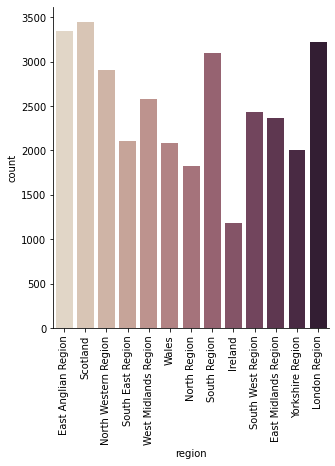

In [7]:
#Region Distribution
fig = sns.catplot(x="region", kind="count", palette="ch:.25", data=stdinfo_df)
fig.set_xticklabels(rotation=90)

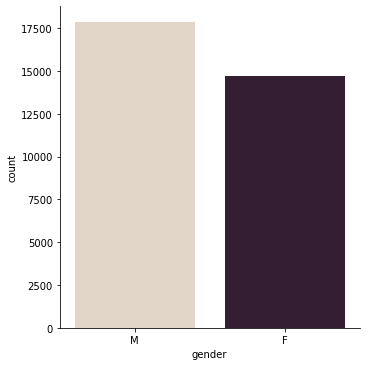

In [8]:
#Gender Distribution
fig = sns.catplot(x="gender", kind="count", palette="ch:.25", data=stdinfo_df)

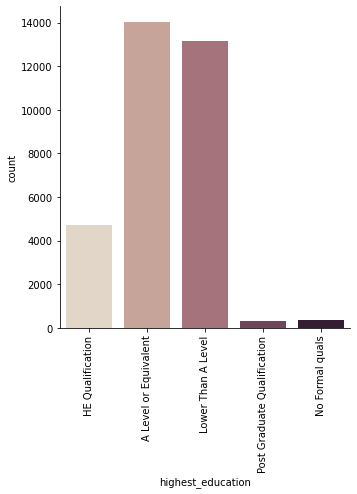

In [9]:
#Highest Education Distribution
fig = sns.catplot(x="highest_education", kind="count", palette="ch:.25", data=stdinfo_df)
fig.set_xticklabels(rotation=90)

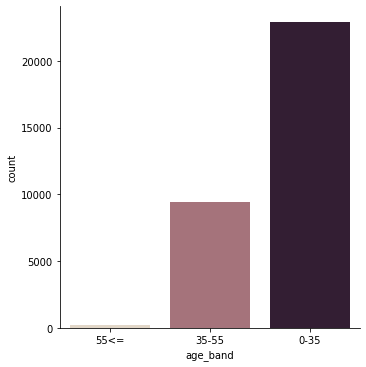

In [10]:
#Age Distribution
fig = sns.catplot(x="age_band", kind="count", palette="ch:.25", data=stdinfo_df)

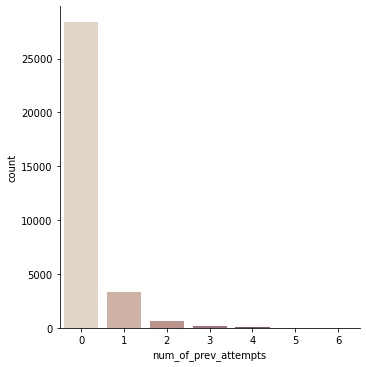

In [11]:
#No of prev attempts Distribution
fig = sns.catplot(x="num_of_prev_attempts", kind="count", palette="ch:.25", data=stdinfo_df)

**Data Preprocessing**

In [12]:
dataset_df = stdinfo_df.merge(stdreg_df[['id_student', 'date_registration']], on='id_student', how='left')
dataset_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40796,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0
40797,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,-23.0
40798,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0
40799,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,-49.0


In [13]:
dataset_df.describe()

,id_student,num_of_prev_attempts,studied_credits,date_registration
count,4.080100e+04,40801.000000,40801.000000,40737.000000
mean,7.061173e+05,0.194088,81.911228,-70.897857
std,5.482693e+05,0.517536,42.079046,50.517542
min,3.733000e+03,0.000000,30.000000,-322.000000
25%,5.091500e+05,0.000000,60.000000,-102.000000
50%,5.895250e+05,0.000000,60.000000,-58.000000
75%,6.377080e+05,0.000000,120.000000,-29.000000
max,2.716795e+06,6.000000,655.000000,167.000000


<AxesSubplot:>

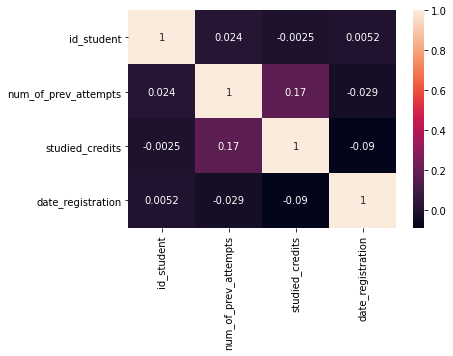

In [14]:
#Correlation Matrix
corr_matrix = dataset_df.corr()
sns.heatmap(corr_matrix, annot=True)

In [15]:
#Checking for NaN values in the dataframe
dataset_df.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1401
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
date_registration         64
dtype: int64

In [16]:
dataset_df['imd_band'].value_counts()

20-30%     4636
30-40%     4421
10-20      4318
0-10%      4091
40-50%     4056
50-60%     3856
60-70%     3657
70-80%     3639
80-90%     3516
90-100%    3210
Name: imd_band, dtype: int64

In [17]:
dataset_df['date_registration'].value_counts()

-22.0     1314
-29.0     1219
-25.0      931
-24.0      912
-23.0      891
          ... 
 49.0        1
-216.0       1
 1.0         1
-283.0       1
-238.0       1
Name: date_registration, Length: 332, dtype: int64

In [18]:
#dataset_df.loc[dataset_df['imd_band'].isnull()]

In [19]:
#dataset_df.loc[dataset_df['date_registration'].isnull()]

In [20]:
#Replacing NaN values in 'date_registration' col with most occurring value
dataset_df['date_registration'].fillna(dataset_df['date_registration'].value_counts().index[0], inplace=True)

In [21]:
#Dropping Rows that has no 'imd_band' value
dataset_df.dropna(inplace=True)
dataset_df.reset_index(drop=True, inplace=True)

In [22]:
stdassmnt_df

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [23]:
#Find students with Assements submitted in the first 30 days
indexNames = stdassmnt_df[stdassmnt_df['date_submitted'] > 31].index

In [24]:
stdassmnt_df.drop(indexNames, inplace=True)
stdassmnt_df.reset_index()
stdassmnt_df

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
172516,37440,624767,-1,1,100.0
172526,37440,631446,-1,1,100.0
172717,37441,624767,-1,1,100.0
172727,37441,631446,-1,1,100.0


In [25]:
stdassmnt_new_df = stdassmnt_df.pivot(index='id_student', columns='id_assessment', values='score')
stdassmnt_new_df.reset_index()
stdassmnt_new_df.fillna(0, inplace=True)
stdassmnt_new_df

id_assessment,1752,1758,1759,1760,1761,1762,14984,14985,14986,14991,...,37415,37425,37435,37436,37437,37438,37439,37440,37441,37442
id_student,,,,,,,,,,,,,,,,,,,,,
6516,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11391,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23629,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2698257,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2698535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
dataset_df = dataset_df.merge(stdassmnt_new_df, on='id_student', how='left')

In [27]:
dataset_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,37415,37425,37435,37436,37437,37438,37439,37440,37441,37442
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39395,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39396,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39397,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39398,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
dataset_df.fillna(0, inplace=True)

In [29]:
display(stdvle_df.name, stdvle_df.head())
display(vle_df.name, vle_df.head())

'studentVle'

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


'vle_df'

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [30]:
print(stdvle_df.name, '\n' ,stdvle_df.isnull().sum())
print('\n')
print(vle_df.name, '\n' ,vle_df.isnull().sum())

studentVle 
 code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64


vle_df 
 id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64


In [31]:
#dropping week_from and week_to columns because they have too many null values
vle_df.drop(['week_from', 'week_to'], axis=1, inplace=True)
vle_df.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


In [32]:
stdvle_new_df = stdvle_df.merge(vle_df, on='id_site', how='left')
stdvle_new_df.head()

,code_module_x,code_presentation_x,id_student,id_site,date,sum_click,code_module_y,code_presentation_y,activity_type
0,AAA,2013J,28400,546652,-10,4,AAA,2013J,forumng
1,AAA,2013J,28400,546652,-10,1,AAA,2013J,forumng
2,AAA,2013J,28400,546652,-10,1,AAA,2013J,forumng
3,AAA,2013J,28400,546614,-10,11,AAA,2013J,homepage
4,AAA,2013J,28400,546714,-10,1,AAA,2013J,oucontent


In [33]:
stdvle_new_df.isnull().sum()

code_module_x          0
code_presentation_x    0
id_student             0
id_site                0
date                   0
sum_click              0
code_module_y          0
code_presentation_y    0
activity_type          0
dtype: int64

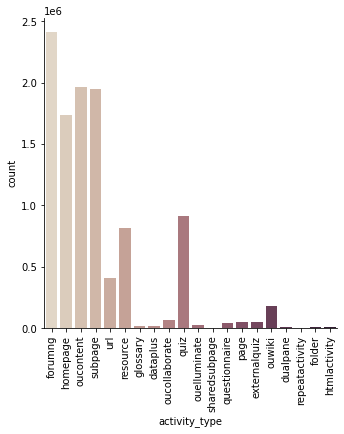

In [34]:
#VLE Activity Type Distribution per number of students
fig = sns.catplot(x="activity_type", kind="count", palette="ch:.25", data=stdvle_new_df)
fig.set_xticklabels(rotation=90)

In [35]:
stdactivity_df = stdvle_new_df[['id_student', 'activity_type', 'sum_click']].groupby(['id_student', 'activity_type']).mean()
stdactivity_df = stdactivity_df.reset_index()
stdactivity_df

,id_student,activity_type,sum_click
0,6516,dataplus,5.250000
1,6516,forumng,2.577143
2,6516,homepage,3.145570
3,6516,oucontent,8.179348
4,6516,resource,1.631579
...,...,...,...
220866,2698588,oucollaborate,1.000000
220867,2698588,oucontent,3.148649
220868,2698588,resource,1.361111
220869,2698588,subpage,2.235294


In [36]:
#Pivoting the dataframe to replace multiple row per student to a single row with multiple columns
stdactivity_df = stdactivity_df.pivot(index='id_student', columns='activity_type', values='sum_click')
stdactivity_df.reset_index()
stdactivity_df

activity_type,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
id_student,,,,,,,,,,,,,,,,,,,,
6516,5.25,NaN,NaN,NaN,2.577143,NaN,3.145570,NaN,NaN,8.179348,NaN,NaN,NaN,NaN,NaN,NaN,1.631579,NaN,1.958904,2.918367
8462,NaN,NaN,1.333333,NaN,1.809524,NaN,3.603774,NaN,1.625000,2.461538,NaN,3.600000,NaN,NaN,NaN,NaN,1.372549,NaN,1.991228,1.352941
11391,NaN,NaN,NaN,NaN,3.711538,NaN,3.450000,NaN,NaN,7.089744,NaN,NaN,NaN,NaN,NaN,NaN,1.181818,NaN,2.909091,1.250000
23629,NaN,NaN,NaN,NaN,3.625000,NaN,2.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.066667,NaN,1.000000,NaN,2.500000,NaN
23698,NaN,NaN,NaN,NaN,1.500000,NaN,1.753623,NaN,NaN,1.000000,NaN,NaN,1.0,NaN,7.578947,NaN,1.050000,NaN,1.441176,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698251,NaN,NaN,1.000000,NaN,3.770492,2.0,4.421053,NaN,1.250000,4.651515,NaN,7.105263,NaN,NaN,NaN,NaN,1.421687,NaN,1.842391,1.137931
2698257,NaN,NaN,NaN,NaN,2.610390,NaN,2.462687,NaN,NaN,3.677778,NaN,NaN,NaN,NaN,NaN,NaN,1.200000,NaN,2.444444,1.000000
2698535,NaN,2.0,NaN,NaN,5.968338,NaN,3.492857,NaN,NaN,3.934343,NaN,11.900000,NaN,NaN,7.901961,NaN,1.181818,NaN,1.547619,1.714286


In [37]:
#replacing NaN values with 0
stdactivity_df = stdactivity_df.fillna(0)
stdactivity_df

activity_type,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
id_student,,,,,,,,,,,,,,,,,,,,
6516,5.25,0.0,0.000000,0.0,2.577143,0.0,3.145570,0.0,0.000000,8.179348,0.0,0.000000,0.0,0.0,0.000000,0.0,1.631579,0.0,1.958904,2.918367
8462,0.00,0.0,1.333333,0.0,1.809524,0.0,3.603774,0.0,1.625000,2.461538,0.0,3.600000,0.0,0.0,0.000000,0.0,1.372549,0.0,1.991228,1.352941
11391,0.00,0.0,0.000000,0.0,3.711538,0.0,3.450000,0.0,0.000000,7.089744,0.0,0.000000,0.0,0.0,0.000000,0.0,1.181818,0.0,2.909091,1.250000
23629,0.00,0.0,0.000000,0.0,3.625000,0.0,2.250000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.066667,0.0,1.000000,0.0,2.500000,0.000000
23698,0.00,0.0,0.000000,0.0,1.500000,0.0,1.753623,0.0,0.000000,1.000000,0.0,0.000000,1.0,0.0,7.578947,0.0,1.050000,0.0,1.441176,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698251,0.00,0.0,1.000000,0.0,3.770492,2.0,4.421053,0.0,1.250000,4.651515,0.0,7.105263,0.0,0.0,0.000000,0.0,1.421687,0.0,1.842391,1.137931
2698257,0.00,0.0,0.000000,0.0,2.610390,0.0,2.462687,0.0,0.000000,3.677778,0.0,0.000000,0.0,0.0,0.000000,0.0,1.200000,0.0,2.444444,1.000000
2698535,0.00,2.0,0.000000,0.0,5.968338,0.0,3.492857,0.0,0.000000,3.934343,0.0,11.900000,0.0,0.0,7.901961,0.0,1.181818,0.0,1.547619,1.714286


Encodding

In [38]:
#One hot encodding Categorical Data
categorical_data = ['code_module', 'code_presentation', 'gender', 'region', 'disability']
encoded_features_df = pd.get_dummies(dataset_df[categorical_data])
encoded_features_df.head()

,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,...,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,disability_N,disability_Y
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [39]:
#Converting Ordinal data to numbers
ordinal_data_names = {'highest_education': ['No Formal quals', 'Lower Than A Level', 'A Level or Equivalent', 'HE Qualification', 'Post Graduate Qualification'],
                   'imd_band': ['0-10%', '10-20', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'],
                   'age_band': ['0-35', '35-55', '55<='],
                   'final_result': ['Fail', 'Withdrawn', 'Pass', 'Distinction']}

output = np.zeros((len(ordinal_data_names), len(dataset_df)))
idx = 0 
for data in sorted(ordinal_data_names):
    output[idx] = (pd.Categorical(dataset_df[data], categories=ordinal_data_names[data])).codes
    idx += 1

In [40]:
ordinal_data_df = pd.DataFrame(output.T, columns=sorted(ordinal_data_names))
ordinal_data_df.head()

,age_band,final_result,highest_education,imd_band
0,2.0,2.0,3.0,9.0
1,1.0,2.0,3.0,2.0
2,1.0,1.0,2.0,3.0
3,1.0,2.0,2.0,5.0
4,0.0,2.0,1.0,5.0


In [41]:
#Droping the Categorical and Ordinal data columns
dataset_new_df = dataset_df.drop(categorical_data, axis=1)
dataset_new_df = dataset_new_df.drop(sorted(ordinal_data_names), axis=1)
#dataset_new_df = dataset_new_df.drop('id_student', axis=1)
dataset_new_df.head()

,id_student,num_of_prev_attempts,studied_credits,date_registration,1752,1758,1759,1760,1761,1762,...,37415,37425,37435,37436,37437,37438,37439,37440,37441,37442
0,11391,0,240,-159.0,78.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28400,0,60,-53.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30268,0,60,-92.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31604,0,60,-52.0,72.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32885,0,60,-176.0,69.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#Merging the new created columns(One hot encoded features and Ordinal encoded features) with the dataset
dataset_new_df = dataset_new_df.join(encoded_features_df).join(ordinal_data_df)
dataset_new_df

,id_student,num_of_prev_attempts,studied_credits,date_registration,1752,1758,1759,1760,1761,1762,...,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,disability_N,disability_Y,age_band,final_result,highest_education,imd_band
0,11391,0,240,-159.0,78.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,2.0,2.0,3.0,9.0
1,28400,0,60,-53.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1.0,2.0,3.0,2.0
2,30268,0,60,-92.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1.0,1.0,2.0,3.0
3,31604,0,60,-52.0,72.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1.0,2.0,2.0,5.0
4,32885,0,60,-176.0,69.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0.0,2.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39395,2640965,0,30,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0.0,0.0,1.0,1.0
39396,2645731,0,30,-23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1.0,3.0,1.0,4.0
39397,2648187,0,30,-129.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0.0,2.0,2.0,2.0
39398,2679821,0,30,-49.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1.0,1.0,1.0,9.0


In [43]:
#Merging vle data with the dataset
dataset_new_df = dataset_new_df.merge(stdactivity_df, on='id_student', how='left')
dataset_new_df

,id_student,num_of_prev_attempts,studied_credits,date_registration,1752,1758,1759,1760,1761,1762,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,11391,0,240,-159.0,78.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.181818,0.0,2.909091,1.250000
1,28400,0,60,-53.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.333333,0.0,2.071429,1.777778
2,30268,0,60,-92.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,1.833333,1.000000
3,31604,0,60,-52.0,72.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.461538,0.0,1.734940,1.764706
4,32885,0,60,-176.0,69.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.956522,0.0,1.490566,1.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39395,2640965,0,30,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,1.500000,0.000000
39396,2645731,0,30,-23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.000000,0.0,1.626866,0.0,2.350000,0.000000
39397,2648187,0,30,-129.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.611111,0.0,1.357143,0.0,1.428571,0.000000
39398,2679821,0,30,-49.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.200000,0.0,1.000000,0.0,2.000000,0.000000


In [44]:
dataset_new_df.isnull().sum()

id_student                 0
num_of_prev_attempts       0
studied_credits            0
date_registration          0
1752                       0
                        ... 
repeatactivity          3103
resource                3103
sharedsubpage           3103
subpage                 3103
url                     3103
Length: 185, dtype: int64

In [45]:
#Filling NaN newly introduced vle data with 0, for students with no vle data
dataset_new_df.fillna(0, inplace=True)

In [46]:
#Dropping 'id_student' from the final dataset
dataset_new_df = dataset_new_df.drop('id_student', axis=1)

In [47]:
#Pair plot
#sns.set_style("whitegrid");
#sns.pairplot(dataset_new_df, hue="final_result", height=3);
#plt.show()

In [48]:
#Feature Scaling

minmaxer = MinMaxScaler()
stdscaler = StandardScaler()
normalizer = Normalizer()

#Uncomment only one of the lines below depenending on which scaler you want to use

#dataset_new_df[['studied_credits', 'date_registration']] = minmaxer.fit_transform(dataset_new_df[['studied_credits', 'date_registration']])
#dataset_new_df[['studied_credits', 'date_registration']] = stdscaler.fit_transform(dataset_new_df[['studied_credits', 'date_registration']])
#dataset_new_df[['studied_credits', 'date_registration']] = normalizer.fit_transform(dataset_new_df[['studied_credits', 'date_registration']])


#ct = ColumnTransformer([('normalizer', Normalizer(), ['studied_credits', 'date_registration'])], remainder='passthrough')
#ct.fit_transform(dataset_new_df)

dataset_new_df.head()

,num_of_prev_attempts,studied_credits,date_registration,1752,1758,1759,1760,1761,1762,14984,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,0,240,-159.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.181818,0.0,2.909091,1.250000
1,0,60,-53.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,0.0,2.071429,1.777778
2,0,60,-92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.833333,1.000000
3,0,60,-52.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.461538,0.0,1.734940,1.764706
4,0,60,-176.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.956522,0.0,1.490566,1.076923


**ML Part**

In [49]:
X = dataset_new_df.drop('final_result', axis=1) #Features (attributes) dataframe
y = dataset_new_df['final_result'] #target (labels) dataframe

In [50]:
print(display(X.head()))
print(y.head())

,num_of_prev_attempts,studied_credits,date_registration,1752,1758,1759,1760,1761,1762,14984,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,0,240,-159.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.181818,0.0,2.909091,1.250000
1,0,60,-53.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,0.0,2.071429,1.777778
2,0,60,-92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.833333,1.000000
3,0,60,-52.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.461538,0.0,1.734940,1.764706
4,0,60,-176.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.956522,0.0,1.490566,1.076923


None
0    2.0
1    2.0
2    1.0
3    2.0
4    2.0
Name: final_result, dtype: float64


In [51]:
#Splitting data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31)

**RandomForrest**

In [52]:
from sklearn.ensemble import RandomForestClassifier
rnd_frst = RandomForestClassifier(n_estimators = 100)
t = time.time()
rnd_frst.fit(X_train, y_train)
print('Random Forrest Training Time:%.2f'%(time.time()-t))

Random Forrest Training Time:10.09


In [53]:
rnd_frst_pred = rnd_frst.predict(X_test)

In [54]:
print(crossValidation(10, rnd_frst, X, y))

[0.7642131979695431, 0.7573604060913706, 0.7791878172588832, 0.7649746192893401, 0.7695431472081218, 0.7753807106598984, 0.7631979695431472, 0.7619289340101523, 0.784010152284264, 0.7730964467005076]


Classification Report
              precision    recall  f1-score   support

         0.0       0.69      0.47      0.56      2512
         1.0       0.80      0.84      0.82      4153
         2.0       0.70      0.91      0.79      4145
         3.0       0.88      0.29      0.44      1010

    accuracy                           0.74     11820
   macro avg       0.77      0.63      0.65     11820
weighted avg       0.75      0.74      0.72     11820



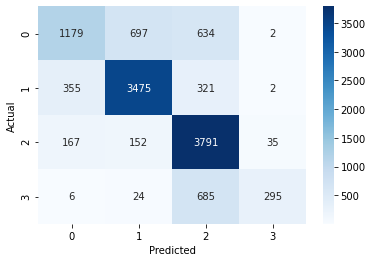

In [55]:
showMetrics(rnd_frst_pred, y_test)

**Decision Tree**

In [53]:
from sklearn.tree import DecisionTreeClassifier
dcs_tr = DecisionTreeClassifier(random_state=11)
t = time.time()
dcs_tr.fit(X_train, y_train)
print('Decision Tree Training Time:%.2f'%(time.time()-t))
dcs_tr_pred = dcs_tr.predict(X_test)

Decision Tree Training Time:1.20


In [54]:
#cross validation
print(crossValidation(10, dcs_tr, X, y))

[0.6730964467005076, 0.6809644670050762, 0.6893401015228426, 0.6928934010152284, 0.682741116751269, 0.6862944162436548, 0.6898477157360406, 0.6695431472081218, 0.6989847715736041, 0.6799492385786802]


Classification Report
              precision    recall  f1-score   support

         0.0       0.50      0.51      0.50      2512
         1.0       0.75      0.75      0.75      4153
         2.0       0.70      0.69      0.69      4145
         3.0       0.43      0.45      0.44      1010

    accuracy                           0.65     11820
   macro avg       0.59      0.60      0.60     11820
weighted avg       0.65      0.65      0.65     11820



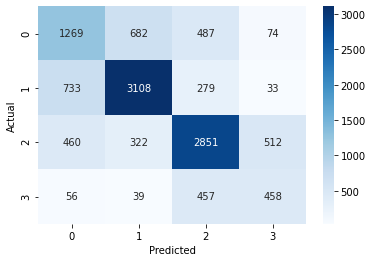

In [55]:
showMetrics(dcs_tr_pred, y_test)

**SVM**

In [63]:

#SVM
from sklearn import svm
'''
t = time.time()
#Linear functoin
linear = svm.SVC(kernel='linear').fit(x_train, y_train)
print('Linear Training Time:%.2f'%(time.time()-t))
'''
t = time.time()
#Radial Basis Function
rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)
print('RBF Training Time:%.2f'%(time.time()-t))

t = time.time()
#Polynomial Function
ploy = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)
print('Poly Training Time:%.2f'%(time.time()-t))

t = time.time()
#Sigmoid Function
sig = svm.SVC(kernel='sigmoid').fit(X_train, y_train)
print('Sigmoid Training Time:%.2f'%(time.time()-t))

RBF Training Time:194.04
Poly Training Time:208.57
Sigmoid Training Time:170.68


In [67]:
#svm_pred = linear.predict(X_test)
svm_pred = rbf.predict(X_test)
#svm_pred = ploy.predict(X_test)
#svm_pred = sig.predict(X_test)

In [ ]:
#cross validation
print(crossValidation(10, rbf, X, y))

Classification Report
              precision    recall  f1-score   support

         0.0       0.51      0.11      0.18      2512
         1.0       0.64      0.65      0.65      4153
         2.0       0.51      0.87      0.64      4145
         3.0       0.62      0.03      0.05      1010

    accuracy                           0.56     11820
   macro avg       0.57      0.41      0.38     11820
weighted avg       0.57      0.56      0.50     11820



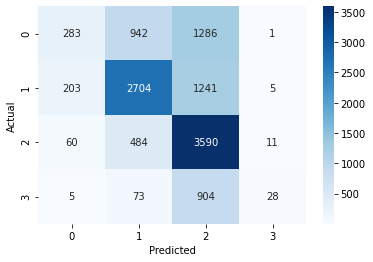

In [68]:
showMetrics(svm_pred, y_test)

**Feedforward Neural Network**

In [52]:
#FFNN
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes = (150,100,50,10),activation ='relu',random_state=11, max_iter=1000)
t = time.time()
mlp_clf.fit(X_train, y_train)
print('FFNN Training Time:%.2f'%(time.time()-t))

mlp_pred = mlp_clf.predict(X_test)

FFNN Training Time:231.61


In [ ]:
#cross validation
print(crossValidation(10, mlp_clf, X, y))

Classification Report
              precision    recall  f1-score   support

         0.0       0.48      0.44      0.46      2512
         1.0       0.75      0.73      0.74      4153
         2.0       0.66      0.74      0.70      4145
         3.0       0.42      0.34      0.38      1010

    accuracy                           0.64     11820
   macro avg       0.58      0.56      0.57     11820
weighted avg       0.63      0.64      0.63     11820



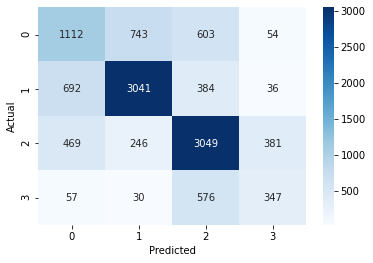

In [53]:
showMetrics(mlp_pred, y_test)

**k Nearest Neighbours**

In [55]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
t = time.time()
knn_clf.fit(X_train, y_train)
print('KNN Training Time:%.2f'%(time.time()-t))

knn_pred = knn_clf.predict(X_test)

KNN Training Time:0.03


In [56]:
#cross validation
print(crossValidation(10, knn_clf, X, y))

[0.534010152284264, 0.5027918781725889, 0.5142131979695431, 0.516243654822335, 0.5203045685279187, 0.5271573604060914, 0.5230964467005076, 0.517005076142132, 0.534010152284264, 0.515736040609137]


Classification Report
              precision    recall  f1-score   support

         0.0       0.35      0.41      0.37      2512
         1.0       0.62      0.60      0.61      4153
         2.0       0.55      0.57      0.56      4145
         3.0       0.38      0.22      0.28      1010

    accuracy                           0.52     11820
   macro avg       0.48      0.45      0.46     11820
weighted avg       0.52      0.52      0.51     11820



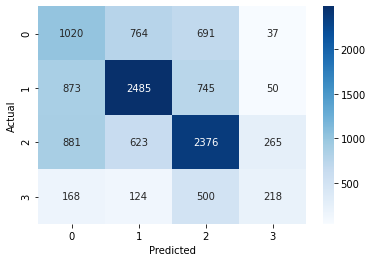

In [57]:
showMetrics(knn_pred, y_test)

**Gradient Boosting (XGBoost)**

In [58]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(objective="multi:softprob", use_label_encoder=False, eval_metric='merror')
t = time.time()
xgb_clf.fit(X_train, y_train)
print('KNN Training Time:%.2f'%(time.time()-t))
xgb_pred = xgb_clf.predict(X_test)

KNN Training Time:21.69


In [ ]:
#cross validation
print(crossValidation(10, xgb_clf, X, y))

Classification Report
              precision    recall  f1-score   support

         0.0       0.60      0.41      0.49      2512
         1.0       0.77      0.81      0.79      4153
         2.0       0.68      0.88      0.77      4145
         3.0       0.65      0.30      0.41      1010

    accuracy                           0.70     11820
   macro avg       0.68      0.60      0.61     11820
weighted avg       0.69      0.70      0.69     11820



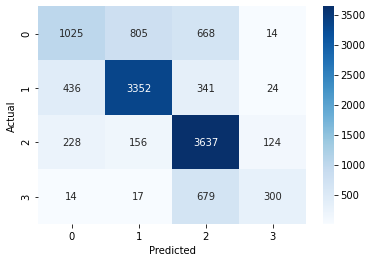

In [59]:
showMetrics(xgb_pred, y_test)

**Naive Bayes**

<font size="1">* Complement and Multinomial Naive Bayes require scaling data with MinMaxScaler to remove negative values</font>

In [60]:
#Naive Bayes
#(Gaussian)
from sklearn.naive_bayes import GaussianNB

nbg_clf = GaussianNB()
nbg_clf.fit(X_train, y_train)
nbg_pred = nbg_clf.predict(X_test)

In [ ]:
#naive Bayes (Complement)
from sklearn.naive_bayes import ComplementNB

nbc_clf = ComplementNB()
nbc_clf.fit(X_train, y_train)
nbc_pred = nbc_clf.predict(X_test)

In [ ]:
#naive Bayes (multinomial)
from sklearn.naive_bayes import MultinomialNB

nbm_clf = MultinomialNB()
nbm_clf.fit(X_train, y_train)
nbm_pred = nbm_clf.predict(X_test)

In [61]:
print(crossValidation(10, nbg_clf, X, y))

[0.10101522842639594, 0.10279187817258884, 0.09873096446700508, 0.10609137055837563, 0.1, 0.10736040609137056, 0.10634517766497462, 0.10228426395939086, 0.09619289340101522, 0.10076142131979696]


Classification Report
              precision    recall  f1-score   support

         0.0       0.28      0.02      0.04      2512
         1.0       0.55      0.03      0.05      4153
         2.0       0.30      0.00      0.00      4145
         3.0       0.09      0.99      0.16      1010

    accuracy                           0.10     11820
   macro avg       0.31      0.26      0.07     11820
weighted avg       0.37      0.10      0.04     11820



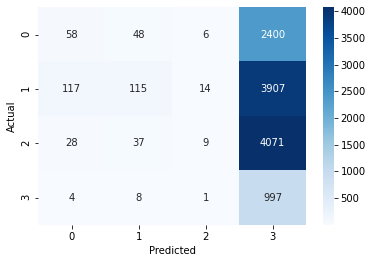

In [62]:
showMetrics(nbg_pred, y_test)